In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, auc, roc_curve, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

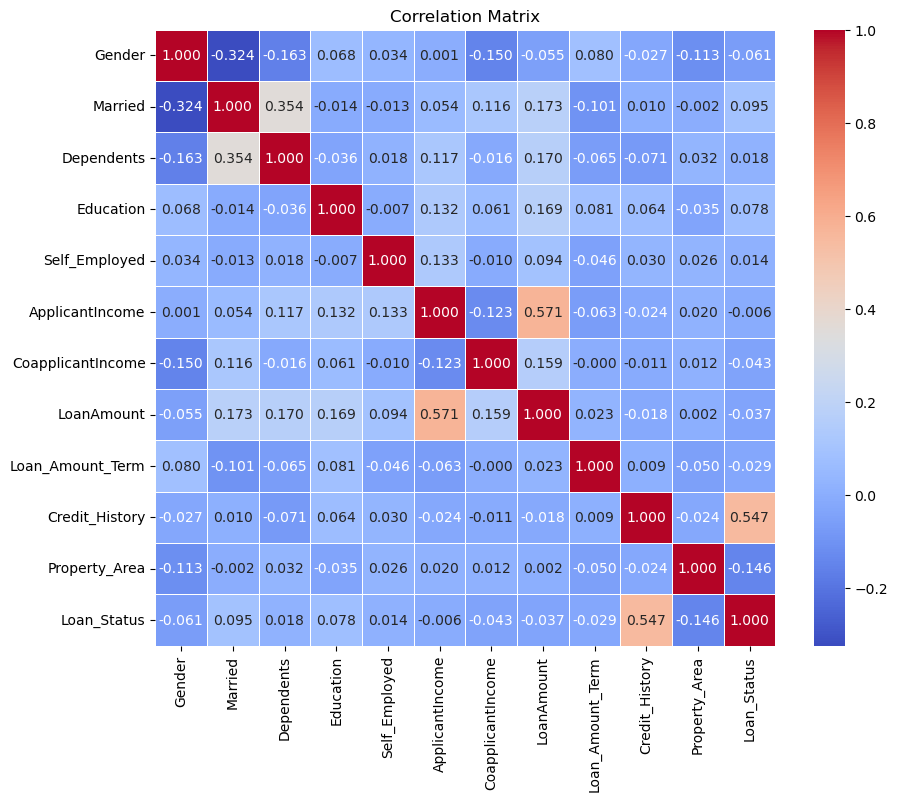

In [2]:
#Correlation Matrix
df_train = pd.read_csv("./loan_sanction_train.csv")

df_train["Gender"] = df_train["Gender"].apply(lambda x: 0 if x == "Male" else 1)

df_train["Married"] = df_train["Married"].apply(lambda x: 0 if x == "No" else 1)

df_train["Dependents"] = df_train["Dependents"].apply(lambda x: 0 if x == "0" else (1 if x == "1" else (2 if x == "2" else 3)))

df_train["Education"] = df_train["Education"].apply(lambda x: 0 if x == "Not Graduate" else 1)

df_train["Self_Employed"] = df_train["Self_Employed"].apply(lambda x: 0 if x == "No" else 1)

df_train["Property_Area"] = df_train["Property_Area"].apply(lambda x: 0 if x == "Rular" else (1 if x == "Semiurban" else 2))

df_train["Loan_Status"] = df_train["Loan_Status"].apply(lambda x: 0 if x == "N" else 1)
df_train = df_train.dropna()
#df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

# Credit History, Married, Education, Dependents, Self_Employed

AUC-PR: 0.89


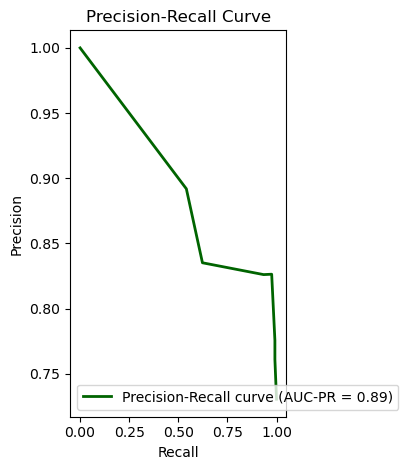

Accuracy Logistic Regression: 83.43%
F1 Score: 89.47%


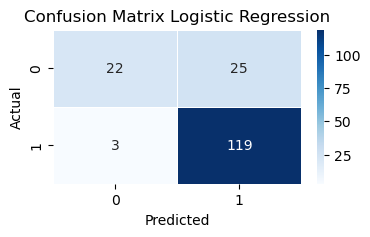

In [3]:
# Select from corr
# import data
df_train = pd.read_csv("./loan_sanction_train.csv")

# selection
df_train = df_train[["Married", "Education", "Credit_History", "Loan_Status"]]

# delete missing value
df_train = df_train.dropna()

# transform data
df_train["Married"] = df_train["Married"].apply(lambda x: 0 if x == "No" else 1)
df_train["Education"] = df_train["Education"].apply(lambda x: 0 if x == "Not Graduate" else 1)
df_train["Loan_Status"] = df_train["Loan_Status"].apply(lambda x: 0 if x == "N" else 1)

# splitting data to train & test data
X = df_train[["Married", "Education", "Credit_History"]]
y = df_train["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features -> memperkecil range
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling 
model = LogisticRegression(max_iter=20)
model.fit(X_train_scaled, y_train)

# Predictions
predictions = model.predict(X_test_scaled)
X_test["prediction"] = predictions
confusion_mtrx = confusion_matrix(y_test, predictions)
#print("Confusion Matrix Logistic Regression: ")
#print(confusion_mtrx)
probability = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probability)
roc_auc = auc(fpr,tpr)
precision, recall, _ = precision_recall_curve(y_test, probability)

#PrecisionRecallCurve
# Compute AUC-PR
auc_pr = auc(recall, precision)
print("AUC-PR: {:.2f}".format(auc_pr))

# Plot precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkgreen', lw=2, label='Precision-Recall curve (AUC-PR = {:.2f})'.format(auc_pr))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


accuracy = accuracy_score(y_test, predictions)
print("Accuracy Logistic Regression: {:.2f}%".format(accuracy * 100))
f1 = f1_score(y_test, predictions)
print("F1 Score: {:.2f}%".format(f1*100))

plt.figure(figsize=(4,2))
sns.heatmap(confusion_mtrx, annot= True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title("Confusion Matrix Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Evaluate accuracy

# -> Confusion Matrix

AUC-PR: 0.83


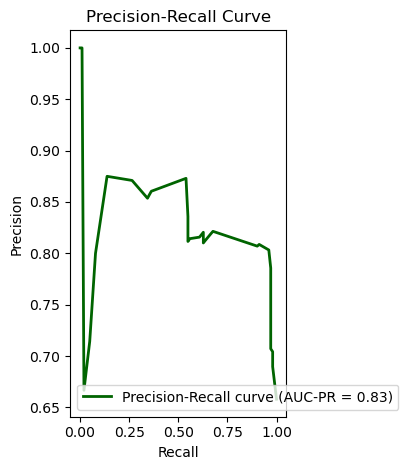

Accuracy Logistic Regression: 82.17%
F1 Score: 87.50%


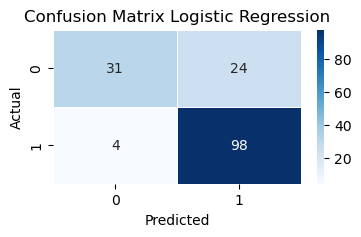

In [4]:
df_train = pd.read_csv("./loan_sanction_train.csv")

# selection
df_train = df_train[["Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Loan_Status"]]

# delete missing value
df_train = df_train.dropna()

# transform data
df_train["Married"] = df_train["Married"].apply(lambda x: 0 if x == "No" else 1)
df_train["Dependents"] = df_train["Dependents"].apply(lambda x: 0 if x == "0" else (1 if x == "1" else (2 if x == "2" else 3)))
df_train["Education"] = df_train["Education"].apply(lambda x: 0 if x == "Not Graduate" else 1)
df_train["Self_Employed"] = df_train["Self_Employed"].apply(lambda x: 0 if x == "No" else 1)
df_train["Loan_Status"] = df_train["Loan_Status"].apply(lambda x: 0 if x == "N" else 1)

# splitting data to train & test data
X = df_train[["Married", "Dependents", "Education", "Self_Employed", "Credit_History"]]
y = df_train["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features -> memperkecil range
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling 
model = LogisticRegression(max_iter=20)
model.fit(X_train_scaled, y_train)

# Predictions
predictions = model.predict(X_test_scaled)
X_test["prediction"] = predictions
confusion_mtrx = confusion_matrix(y_test, predictions)
#print("Confusion Matrix Logistic Regression: ")
#print(confusion_mtrx)

probability = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probability)
roc_auc = auc(fpr,tpr)
precision, recall, _ = precision_recall_curve(y_test, probability)

#PrecisionRecallCurve
auc_pr = auc(recall, precision)
print("AUC-PR: {:.2f}".format(auc_pr))

# Plot precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkgreen', lw=2, label='Precision-Recall curve (AUC-PR = {:.2f})'.format(auc_pr))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

accuracy = accuracy_score(y_test, predictions)
print("Accuracy Logistic Regression: {:.2f}%".format(accuracy * 100))
f1 = f1_score(y_test, predictions)
print("F1 Score: {:.2f}%".format(f1*100))

plt.figure(figsize=(4,2))
sns.heatmap(confusion_mtrx, annot= True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title("Confusion Matrix Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Evaluate accuracy


Accuracy Logistic Regression: 85.90%
F1 Score: 91.34%


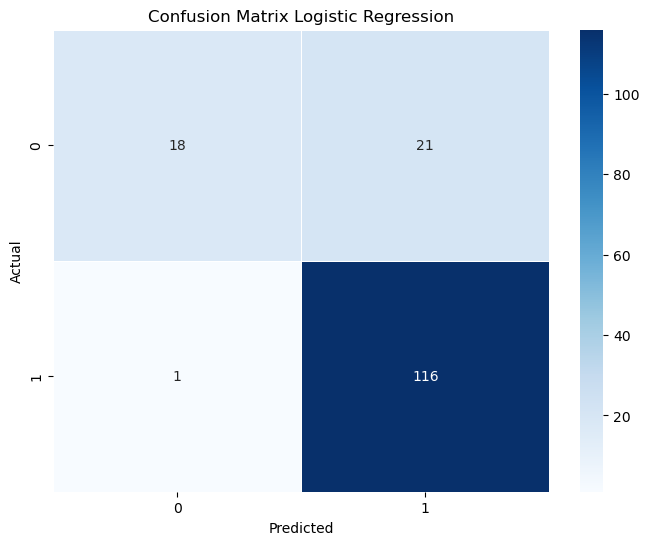

In [11]:
df_train = pd.read_csv("./loan_sanction_train.csv")

# selection
df_train = df_train[["Married", "Dependents", "Education", "ApplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Loan_Status"]]

# delete missing value
df_train = df_train.dropna()

# transform data
df_train["Married"] = df_train["Married"].apply(lambda x: 0 if x == "No" else 1)
df_train["Dependents"] = df_train["Dependents"].apply(lambda x: 0 if x == "0" else (1 if x == "1" else (2 if x == "2" else 3)))
df_train["Education"] = df_train["Education"].apply(lambda x: 0 if x == "Not Graduate" else 1)
#df_train["Self_Employed"] = df_train["Self_Employed"].apply(lambda x: 0 if x == "No" else 1)
df_train["Loan_Status"] = df_train["Loan_Status"].apply(lambda x: 0 if x == "N" else 1)

# splitting data to train & test data
X = df_train[["Married", "Dependents", "Education", "ApplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]]
y = df_train["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features -> memperkecil range
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling 
model = LogisticRegression(max_iter=20)
model.fit(X_train_scaled, y_train)

# Predictions
predictions = model.predict(X_test_scaled)
X_test["prediction"] = predictions
confusion_mtrx = confusion_matrix(y_test, predictions)
#print("Confusion Matrix Logistic Regression: ")
#print(confusion_mtrx)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy Logistic Regression: {:.2f}%".format(accuracy * 100))
f1 = f1_score(y_test, predictions)
print("F1 Score: {:.2f}%".format(f1*100))
plt.figure(figsize=(8,6))
sns.heatmap(confusion_mtrx, annot= True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title("Confusion Matrix Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Evaluate accuracy


In [24]:
# Real Life application
df_test = pd.read_csv("./loan_sanction_test.csv")

rl_data = df_test[["Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "Credit_History"]]

rl_data = rl_data.dropna()

rl_data["Married"]=rl_data["Married"].apply(lambda x: 0 if x == "No" else 1)

rl_data["Dependents"] = rl_data["Dependents"].apply(lambda x: 0 if x == "0" else (1 if x == "1" else (2 if x == "2" else 3)))

rl_data["Education"] = rl_data["Education"].apply(lambda x: 0 if x == "Not Graduate" else 1)

rl_data["Self_Employed"] = rl_data["Self_Employed"].apply(lambda x: 0 if x == "No" else 1)

rl_scale = scaler.fit_transform(rl_data)
rl_predict = model.predict(rl_data)
rl_data["prediction"] = rl_predict

print(rl_data[["Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "Credit_History", "prediction"]])

     Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0          1           0          1              0             5720   
1          1           1          1              0             3076   
2          1           2          1              0             5000   
4          0           0          0              0             3276   
5          1           0          0              1             2165   
..       ...         ...        ...            ...              ...   
361        1           1          1              0             2269   
362        1           3          0              1             4009   
363        1           0          1              0             4158   
365        1           0          1              0             5000   
366        0           0          1              1             9200   

     Credit_History  prediction  
0               1.0           1  
1               1.0           1  
2               1.0           1  
4          

c:\Users\erics\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
